## Modeling Part 1

Here we shall be modeling the dataset based on Logistic Regression, Decision Tree and Random Forest and then will be calculating the results in form of confusion matrix and classification report. 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("../dataset/merged.csv")
df.drop(columns=["Time(ms)"], inplace=True)
df

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


In [13]:
df_pca = pd.read_csv("../dataset/pca_df.csv")
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,annotation
0,-2.040942,3.389135,-0.697435,2.427390,2.321785,-0.222592,0
1,-1.235390,1.358520,-0.656503,0.102055,0.388039,-1.847160,0
2,-1.501984,1.165822,-0.824926,0.141681,1.516479,-1.859010,0
3,-1.638330,1.481119,-0.705295,0.630510,2.080654,-1.730703,0
4,-1.268800,1.588218,-0.809263,0.511559,0.913394,-1.778680,0
...,...,...,...,...,...,...,...
1021876,-3.062620,0.818409,-0.151781,0.252098,-0.139664,-1.649739,1
1021877,-2.871607,-0.420508,0.406236,0.927885,-0.445085,-1.281501,1
1021878,-2.641319,-0.747211,0.250917,1.298763,-0.566486,-1.162638,1
1021879,-3.087607,-1.209168,0.641357,1.558142,-0.524909,-0.810112,1


In [9]:
x = df.drop(columns=["annotation"])
y = df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  7249  50664     50]
 [  3291 127355    495]
 [   101  15048    124]]
              precision    recall  f1-score   support

           0       0.68      0.13      0.21     57963
           1       0.66      0.97      0.79    131141
           2       0.19      0.01      0.02     15273

    accuracy                           0.66    204377
   macro avg       0.51      0.37      0.34    204377
weighted avg       0.63      0.66      0.57    204377



In [12]:
for i in range(2,10):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_rfe = rfe.transform(x_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe, y_train)
    y_pred = model.predict(x_test_rfe)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[[    19  57915     29]
 [   230 130560    351]
 [     0  15242     31]]
              precision    recall  f1-score   support

           0       0.08      0.00      0.00     57963
           1       0.64      1.00      0.78    131141
           2       0.08      0.00      0.00     15273

    accuracy                           0.64    204377
   macro avg       0.26      0.33      0.26    204377
weighted avg       0.44      0.64      0.50    204377

[[    20  57915     28]
 [   186 130673    282]
 [     0  15234     39]]
              precision    recall  f1-score   support

           0       0.10      0.00      0.00     57963
           1       0.64      1.00      0.78    131141
           2       0.11      0.00      0.00     15273

    accuracy                           0.64    204377
   macro avg       0.28      0.33      0.26    204377
weighted avg       0.45      0.64      0.50    204377

[[  1790  56151     22]
 [  6364 124552    225]
 [     0  15246     27]]
              preci

In [14]:
x = df_pca.drop(columns=["annotation"])
y = df_pca["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  4356  53599      8]
 [  4884 126093    164]
 [   132  15076     65]]
              precision    recall  f1-score   support

           0       0.46      0.08      0.13     57963
           1       0.65      0.96      0.77    131141
           2       0.27      0.00      0.01     15273

    accuracy                           0.64    204377
   macro avg       0.46      0.35      0.30    204377
weighted avg       0.57      0.64      0.53    204377



In [15]:
for i in range(2,6):
    rfe = RFE(model, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_rfe = rfe.transform(x_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe, y_train)
    y_pred = model.predict(x_test_rfe)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

[[     0  57958      5]
 [     0 131122     19]
 [     0  15265      8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57963
           1       0.64      1.00      0.78    131141
           2       0.25      0.00      0.00     15273

    accuracy                           0.64    204377
   macro avg       0.30      0.33      0.26    204377
weighted avg       0.43      0.64      0.50    204377



C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dev\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   205  57749      9]
 [   166 130890     85]
 [     8  15235     30]]
              precision    recall  f1-score   support

           0       0.54      0.00      0.01     57963
           1       0.64      1.00      0.78    131141
           2       0.24      0.00      0.00     15273

    accuracy                           0.64    204377
   macro avg       0.47      0.33      0.26    204377
weighted avg       0.58      0.64      0.50    204377

[[  5006  52949      8]
 [  4108 126969     64]
 [    73  15176     24]]
              precision    recall  f1-score   support

           0       0.54      0.09      0.15     57963
           1       0.65      0.97      0.78    131141
           2       0.25      0.00      0.00     15273

    accuracy                           0.65    204377
   macro avg       0.48      0.35      0.31    204377
weighted avg       0.59      0.65      0.54    204377

[[  4627  53330      6]
 [  5249 125765    127]
 [   130  15095     48]]
              preci

In [17]:
x = df.drop(columns=["annotation"])
y = df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 47030   9531   1402]
 [ 10213 113009   7919]
 [  1506   7263   6504]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     57963
           1       0.87      0.86      0.87    131141
           2       0.41      0.43      0.42     15273

    accuracy                           0.81    204377
   macro avg       0.69      0.70      0.70    204377
weighted avg       0.82      0.81      0.82    204377



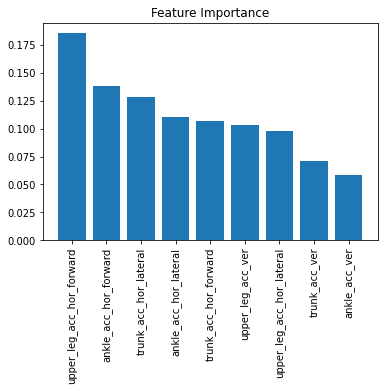

In [22]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [45]:
lst = ['upper_leg_acc_hor_forward', 'ankle_acc_hor_forward', 'trunk_acc_hor_lateral',
      'ankle_acc_hor_lateral', 'trunk_acc_hor_forward', 'upper_leg_acc_ver']
x_latest = df[lst]
new_df = pd.concat([x_latest, df['annotation']], axis=1)
new_df

,upper_leg_acc_hor_forward,ankle_acc_hor_forward,trunk_acc_hor_lateral,ankle_acc_hor_lateral,trunk_acc_hor_forward,upper_leg_acc_ver,annotation
0,-36,-40,349,326,320,962,0
1,54,-60,446,316,77,953,0
2,-27,-111,446,346,-48,953,0
3,36,-111,446,346,-38,981,0
4,18,-60,436,346,77,972,0
...,...,...,...,...,...,...,...
1021876,690,-212,349,376,77,-166,1
1021877,572,-232,339,356,67,-55,1
1021878,272,-232,359,356,97,92,1
1021879,354,-252,359,346,87,18,1


In [46]:
new_df.isna().sum()

upper_leg_acc_hor_forward    0
ankle_acc_hor_forward        0
trunk_acc_hor_lateral        0
ankle_acc_hor_lateral        0
trunk_acc_hor_forward        0
upper_leg_acc_ver            0
annotation                   0
dtype: int64

In [47]:
x = new_df.drop(columns=["annotation"])
y = new_df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 46124  10285   1554]
 [ 11574 110810   8757]
 [  1576   7797   5900]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     57963
           1       0.86      0.84      0.85    131141
           2       0.36      0.39      0.37     15273

    accuracy                           0.80    204377
   macro avg       0.67      0.68      0.67    204377
weighted avg       0.80      0.80      0.80    204377



In [48]:
x = df_pca.drop(columns=["annotation"])
y = df_pca["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 42873  13129   1961]
 [ 13558 108370   9213]
 [  1826   8525   4922]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     57963
           1       0.83      0.83      0.83    131141
           2       0.31      0.32      0.31     15273

    accuracy                           0.76    204377
   macro avg       0.63      0.63      0.63    204377
weighted avg       0.77      0.76      0.77    204377



In [52]:
x = df.drop(columns=["annotation"])
y = df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 48384   9280    299]
 [  4083 125296   1762]
 [   294   9633   5346]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     57963
           1       0.87      0.96      0.91    131141
           2       0.72      0.35      0.47     15273

    accuracy                           0.88    204377
   macro avg       0.84      0.71      0.75    204377
weighted avg       0.87      0.88      0.87    204377



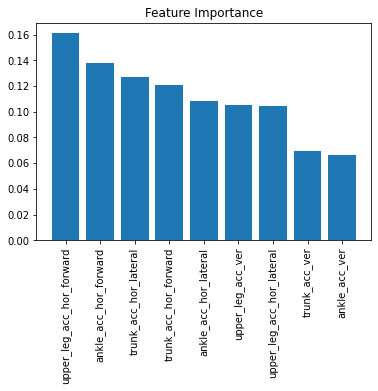

In [53]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [54]:
lst = ['upper_leg_acc_hor_forward', 'ankle_acc_hor_forward', 'trunk_acc_hor_lateral',
      'ankle_acc_hor_lateral', 'trunk_acc_hor_forward', 'upper_leg_acc_ver']
x_latest = df[lst]
new_df = pd.concat([x_latest, df['annotation']], axis=1)
new_df

,upper_leg_acc_hor_forward,ankle_acc_hor_forward,trunk_acc_hor_lateral,ankle_acc_hor_lateral,trunk_acc_hor_forward,upper_leg_acc_ver,annotation
0,-36,-40,349,326,320,962,0
1,54,-60,446,316,77,953,0
2,-27,-111,446,346,-48,953,0
3,36,-111,446,346,-38,981,0
4,18,-60,436,346,77,972,0
...,...,...,...,...,...,...,...
1021876,690,-212,349,376,77,-166,1
1021877,572,-232,339,356,67,-55,1
1021878,272,-232,359,356,97,92,1
1021879,354,-252,359,346,87,18,1


In [55]:
x = new_df.drop(columns=["annotation"])
y = new_df["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 46923  10614    426]
 [  5538 123205   2398]
 [   471   9994   4808]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85     57963
           1       0.86      0.94      0.90    131141
           2       0.63      0.31      0.42     15273

    accuracy                           0.86    204377
   macro avg       0.79      0.69      0.72    204377
weighted avg       0.85      0.86      0.85    204377



In [56]:
x = df_pca.drop(columns=["annotation"])
y = df_pca["annotation"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 44529  13050    384]
 [  6158 123423   1560]
 [   563  11705   3005]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     57963
           1       0.83      0.94      0.88    131141
           2       0.61      0.20      0.30     15273

    accuracy                           0.84    204377
   macro avg       0.77      0.64      0.67    204377
weighted avg       0.83      0.84      0.82    204377

